In [120]:
import torch as torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# repres = []
# gt = []
# label = []
# for i in range(11):
#     repres.append(torch.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_{i}.pt").numpy())
#     gt.append(torch.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_{i}.pt").numpy())
#     label.append(np.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_{i}.npy"))
# repres = np.concatenate(repres)
# gt = np.concatenate(gt)
# label = np.concatenate(label)

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_uniformity19_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_uniformity19_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_uniformity19_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_dropout23_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_dropout23_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_dropout23_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_unitrepre37_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_unitrepre37_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_unitrepre37_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_alignment44_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_alignment44_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_alignment44_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_withoutbaseprice43_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_withoutbaseprice43_0.pt").numpy()
# prediction = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/prediction_withoutbaseprice43_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_withoutbaseprice43_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_withoutbasepricenorelu38_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_withoutbasepricenorelu38_0.pt").numpy()
# prediction = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/prediction_withoutbasepricenorelu38_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_withoutbasepricenorelu38_0.npy")


repres = []
gt = []
label = []
prediction = [] 
for i in range(11):
    repres.append(torch.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_withoutbasepricenorelu38_{i}.pt").numpy())
    gt.append(torch.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_withoutbasepricenorelu38_{i}.pt").numpy())
    prediction.append(torch.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/prediction_withoutbasepricenorelu38_{i}.pt").numpy())
    label.append(np.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_withoutbasepricenorelu38_{i}.npy"))
    
repres = np.concatenate(repres)
gt = np.concatenate(gt)
label = np.concatenate(label)
prediction = np.concatenate(prediction)
repres.shape

(11286, 133)

In [121]:
def plot_easy_hard(data):
    fig = plt.figure()      # 创建图形实例
    ax = plt.subplot(111)       # 创建子图
    # 遍历所有样本
    for i in range(data.shape[0]):
        # 在图中为每个数据点画出标签
        if label[i]==0:
            plt.text(data[i, 0], data[i, 1], str(int(label[i])), color=plt.cm.Set1(label[i]),
                    fontdict={'size': 3})
        else:
            plt.text(data[i, 0], data[i, 1], str(int(label[i])), color=plt.cm.Set1(label[i]),
                    fontdict={'size': 7})
    plt.xlim((np.min(data,0)[0], np.max(data,0)[0]))
    plt.ylim((np.min(data,0)[1], np.max(data,0)[1]))

    plt.xticks()        # 指定坐标的刻度
    plt.yticks()
    return fig

def plot_embedding_heatmap(data, label, title, mask):
    # 去除一下outliers  看下数据的分布的情况
    fig = plt.figure()      # 创建图形实例
    ax = plt.subplot(111)       # 创建子图  
    # 去除label中的离群值 再重新画 暂定为排序从5%-95%
    temp = np.sort(label)
    lower_value = temp[int(len(label)*0.05)]
    upper_value = temp[int(len(label)*0.95)]
    new_mask = (label>lower_value)*(label<upper_value)
    scatter = ax.scatter(data[:,0][new_mask].squeeze(), data[:,1][new_mask].squeeze(), c=label[new_mask], cmap='coolwarm', alpha=0.7,s=4)
    # scatter = ax.scatter(data[:,0].squeeze(), data[:,1].squeeze(), c=label, cmap='coolwarm', alpha=0.7,)
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend2 = ax.legend(handles, labels,  title="Colors")
    plt.title(title, fontsize=14)
    return fig

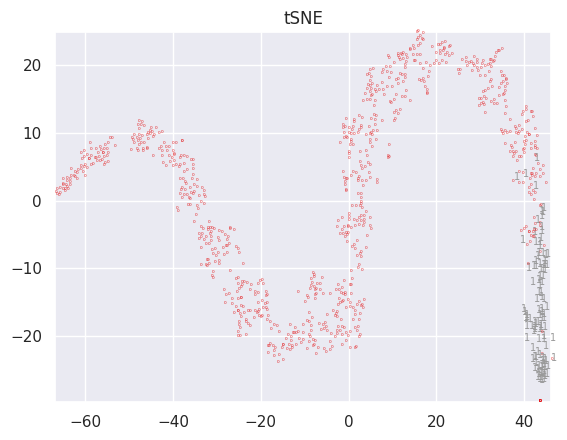

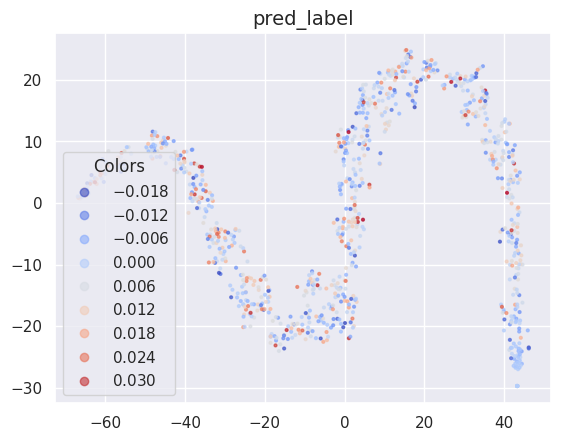

In [115]:
ts = TSNE(n_components=2, init='pca', random_state=0)
data = ts.fit_transform(repres)

fig = plot_easy_hard(data)
plt.title("tSNE")
plt.show()
fig = plot_embedding_heatmap(data=data, label=gt.squeeze(),mask=label, title='pred_label')
plt.show()

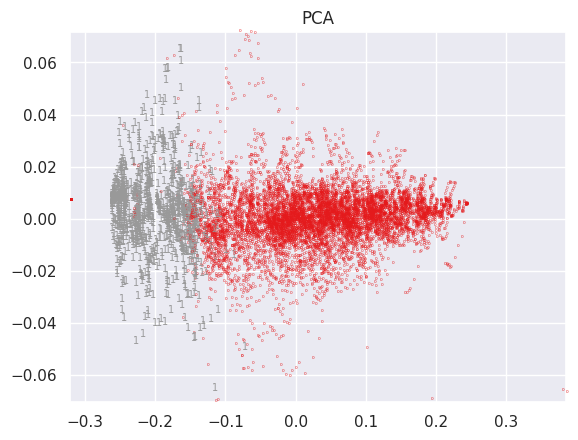

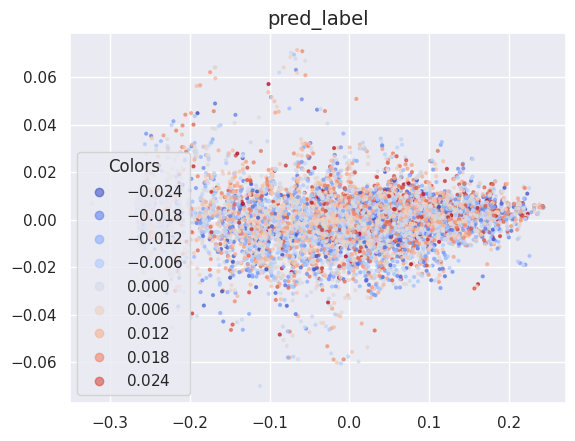

In [122]:
pca = PCA(n_components=2)
data = pca.fit_transform(repres)

fig = plot_easy_hard(data)
plt.title("PCA")
plt.show()
fig = plot_embedding_heatmap(data=data, label=gt.squeeze(),mask=label, title='pred_label')
plt.show()

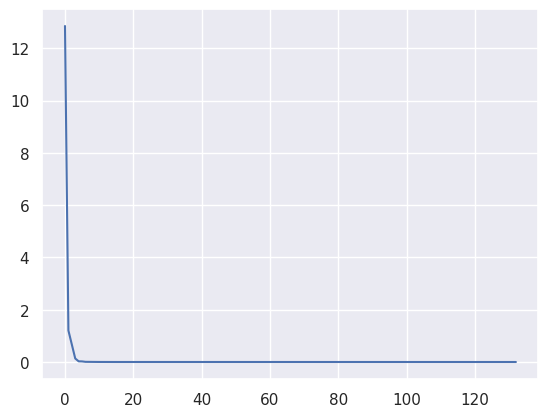

[1.28585796e+01 1.20625806e+00 6.77158713e-01 1.34327963e-01
 2.63610296e-02 2.27891691e-02 6.76143263e-03 4.61122673e-03
 3.43925389e-03 3.35994456e-03 1.88129803e-03 8.76974198e-04
 8.37213185e-04 6.47753128e-04 3.84081446e-04 3.42724845e-04
 3.29062023e-04 2.26053409e-04 1.88455742e-04 1.08843975e-04
 1.00263627e-04 8.90731899e-05 8.22426373e-05 7.12997280e-05
 6.46154222e-05 5.69349540e-05 3.57673198e-05 2.35517946e-05
 1.89568309e-05 1.75709010e-05 1.61566331e-05 1.38827700e-05
 8.86289126e-06 7.83715859e-06 7.60950479e-06 7.45242414e-06
 6.06976846e-06 5.49684773e-06 4.64143886e-06 3.89974093e-06
 3.80328947e-06 3.62757032e-06 3.51598419e-06 2.92845016e-06
 2.68586723e-06 2.46971717e-06 1.92696075e-06 1.78276764e-06
 1.52733151e-06 1.30465878e-06 1.20320863e-06 1.08920756e-06
 9.95870323e-07 9.57165412e-07 9.29883981e-07 8.98296776e-07
 8.39704057e-07 7.79297181e-07 7.32994124e-07 6.54523546e-07
 6.29287399e-07 6.01254783e-07 5.73561636e-07 5.03563285e-07
 4.87882176e-07 4.780119

In [123]:
def svd(repres):
    c = np.linalg.svd(repres)
    return c[1]
svds = svd(repres)
plt.plot(svds)
plt.show()
svds.shape
print(svds)

[0.15466763 0.16186534 0.07704495 ... 0.05717968 0.11407892 0.02771841]


/tmp/ipykernel_27059/1159276877.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm, hist=True, kde=False)


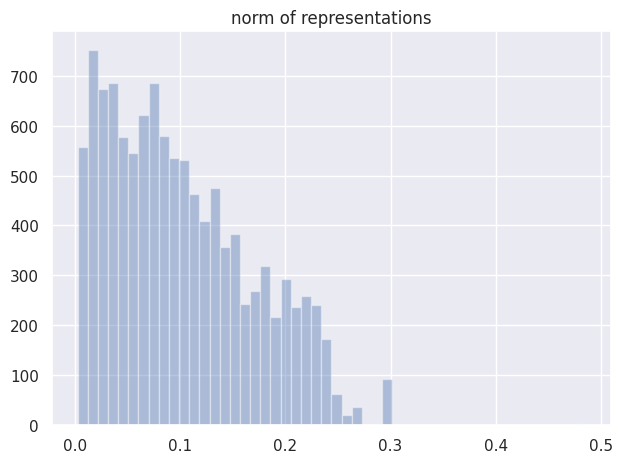

In [124]:
# 这里分析一下 repres里面的大小，角度，pairwise相似性等指标

norm = np.linalg.norm(repres, axis=1)
# norm.shape
print(norm)
import seaborn as sns

sns.set()  #切换到sns的默认运行配置
# sns.distplot(nums,hist=True,norm_hist=False,kde=False,)
sns.distplot(norm, hist=True, kde=False)
#添加x轴和y轴标签
plt.title("norm of representations")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



/tmp/ipykernel_27059/1366803036.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coss, hist=True, kde=False)


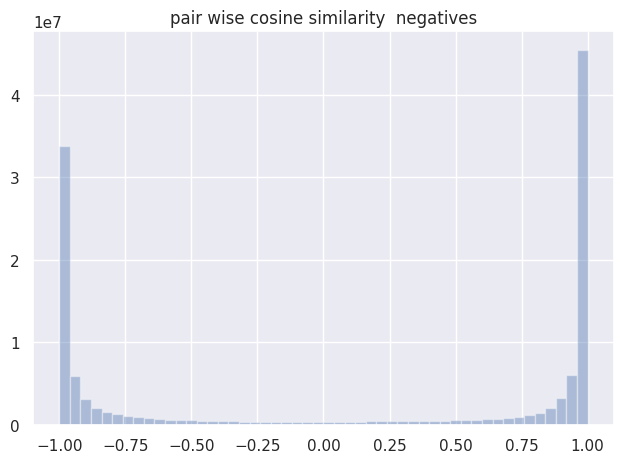

In [125]:
def pair_wise_cos(a,b):
    a_norm = a/np.linalg.norm(a,axis=1)[:, None]
    b_norm = b/np.linalg.norm(b,axis=1)[:, None]
    res = a_norm @ b_norm.T
    return res

coss = pair_wise_cos(repres, repres)
sns.set()  
sns.distplot(coss, hist=True, kde=False)
plt.title("pair wise cosine similarity  negatives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()

In [126]:
# 看一下y相近的样本  对应的cosine similarity分布情况
gt.shape

(11286, 1)

0.08647882332092859
0.0023638755 0.03984432
[ 1.        -0.9917967  0.9991671 ... -0.9008853  0.942169   0.9999995]
[0.9999015  0.99847716 0.99986273 ... 0.9525426  0.9634732  0.9566309 ]
0.06708747
0.15941833


/tmp/ipykernel_27059/3006650369.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coss_positives, hist=True, kde=False)


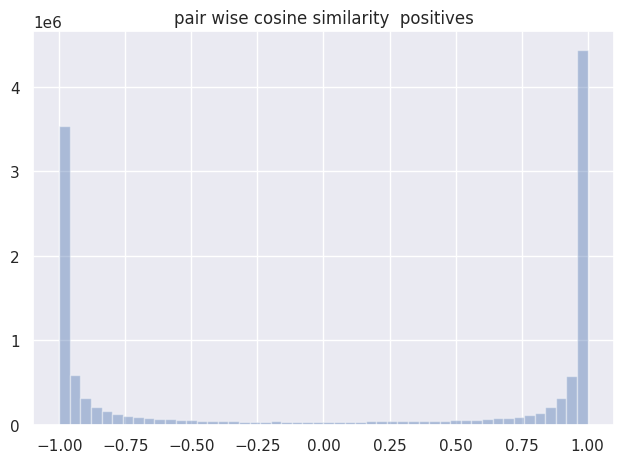

/tmp/ipykernel_27059/3006650369.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coss_negatives, hist=True, kde=False)


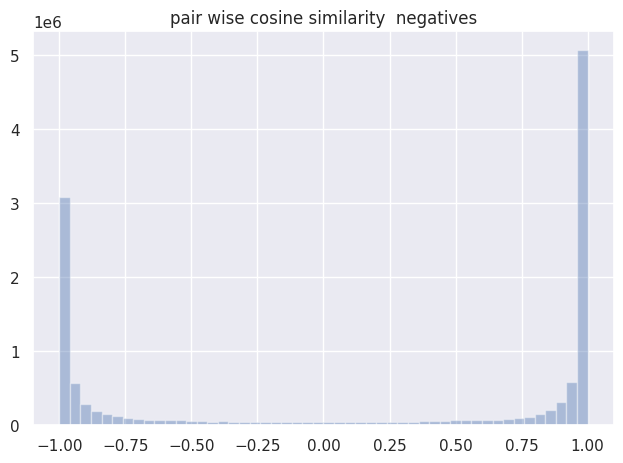

In [127]:
print((np.abs(gt)<1e-3).sum()/gt.shape[0])  # 有9.25%的股票 价格基本没有变动

# 还是排序找出top20%和tail20%的相似度
diff = np.sort(np.abs(gt-gt.T).reshape(-1))
low_bound = diff[int(len(diff)*0.10)]
high_bound = diff[int(len(diff)*0.90)]
print(low_bound, high_bound)

mask_positives = (np.abs(gt-gt.T))<low_bound  
mask_negatives = (np.abs(gt-gt.T))>high_bound

coss_positives = pair_wise_cos(repres, repres)[np.where(mask_positives==1)]
coss_negatives = pair_wise_cos(repres, repres)[np.where(mask_negatives==1)]

print(coss_positives)
print(coss_negatives)
print(np.mean(coss_positives))
print(np.mean(coss_negatives))
sns.set()  
sns.distplot(coss_positives, hist=True, kde=False)
plt.title("pair wise cosine similarity  positives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()

sns.set()  
sns.distplot(coss_negatives, hist=True, kde=False)
plt.title("pair wise cosine similarity  negatives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



In [ ]:

sns.set()  
sns.distplot(gt, hist=True, kde=False)
plt.title("gt")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



In [ ]:
# x 相似  即 cos similarity较大
# 
# 还是排序找出top20%和tail20%的相似度
diff = np.sort(coss.reshape(-1))
low_bound = diff[int(len(diff)*0.10)]
high_bound = diff[int(len(diff)*0.90)]
print(low_bound, high_bound)

mask_positives = coss>high_bound
mask_negatives = coss<low_bound

y_diff = np.abs(gt-gt.T)

y_positives = y_diff[np.where(mask_positives==1)]
y_negatives = y_diff[np.where(mask_negatives==1)]

print(y_positives) # 0.016   
print(y_negatives) # 0.021   
print(np.mean(y_positives))
print(np.mean(y_negatives))
sns.set()  
sns.distplot(y_positives, hist=True, kde=False)
plt.title("y  positives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()

sns.set()  
sns.distplot(y_negatives, hist=True, kde=False)
plt.title("y  negatives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



In [ ]:
# 测试一下 看一下loss的分布 
prediction = prediction.squeeze()
gt = gt.squeeze()
losses = np.square(prediction-gt)
print(losses, np.mean(losses))
print(np.sum(losses>np.mean(losses)).sum()/len(losses))

sample_losses = np.sort(losses)
sample_losses = sample_losses[int(0*len(sample_losses)):int(0.95*len(sample_losses))]
# print(sample_losses)
print(len(sample_losses))


sns.set()  
sns.distplot(sample_losses, hist=True, kde=False)
plt.title("losses distribution (0%-95%)")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()




In [ ]:

sns.set()  
sns.distplot(prediction, hist=True, kde=False)
plt.title("prediction distribution")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()


In [ ]:
# 下面画一个按真值排序的图，看下prediction的情况
# 看-0.07到0.07的情况
prediction_ = prediction[(gt<0.02)&(gt>-0.02)]
gt_ = gt[(gt<0.02)&(gt>-0.02)]
print(gt.shape)

indexes = np.argsort(gt_)
gt_ = gt_[indexes]
prediction_ = prediction_[indexes]
plt.plot(gt_)
plt.plot(prediction_)
plt.show()


In [ ]:
# 看一下 label=0 (即预定义的hard samples) 的prediction 和 gt的分布

sns.set()  
sns.distplot(gt[label==1], hist=True, kde=False)  # label为1的为困难样本
plt.title("hard samples gt")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()

sns.set()  
sns.distplot(gt[label==0], hist=True, kde=False)  # label为1的为困难样本
plt.title("easy samples gt")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()


In [ ]:
# ts = TSNE(n_components=2, init='pca', random_state=0)
# data = ts.fit_transform(repres)
pca = PCA(n_components=2)
data = pca.fit_transform(repres)

rank = np.argsort(np.argsort(losses))# 让loss 按照rank来涂颜色  （normalization之后）



fig = plot_embedding_heatmap(data=data, label=rank.squeeze(),mask=label, title='pred_label')
plt.show()


In [ ]:
# 对难易程度的划分好像不太一样？
# 看一下二者对难易程度判断的重合程度   目前看上去好像不怎么重合？？？ 但是分布上  用原来的判别方式又分的很开？？
# 有个小瑕疵   没考虑mask的事情

sort_index = np.argsort(losses)[::-1]

mask_by_self = np.zeros_like(losses)

mask_by_self[sort_index[:int(np.sum(label))]] = 1

print([i for i in mask_by_self])
print(np.sum(mask_by_self))

same_count = 0
for i in range(len(losses)):
    if label[i]>0.5 and mask_by_self[i]>0.5:
        same_count+=1        # 同时为1的样本只有9个 
print(same_count)
print(int(np.sum(label)))



In [ ]:
# 下面分析一下 cosine similarity为1和-1 的样本    其实还是一个方向  只不过是在0的两侧

In [ ]:
# 如果用原来LSTM模型给到的loss（hard和easy的打分） 来进行可视化   看看loss是不是渐变的